# MTpy Example 03

Now that we have an `MTCollection` stored in an `MTH5` we can now plot interesting things.  All the plotting functions can be called directly from the `MTCollection` object. First, let's plot station coverage.  

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib widget

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [11]:
with MTCollection() as mc:
    mc.open_collection(Path(r"../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5"))
    mt_data = mc.to_mt_data()

23:11:14T08:52:50 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5


## Plot Stations

First lets plot the station coverage on a map.  MTpy uses `contextily` if installed to get a USGS Topo map to plot the stations on to.  If you want a different map, maybe imagery, just change the `cx_source` to what you would like.  See [Contextily Documentation](https://contextily.readthedocs.io/en/latest/intro_guide.html) for more details.   

For geospatial plotting a method called `MTCollection.to_geo_df` is provided to produce a `Geopandas.DataFrame` object that can be used for plotting station locations.  You can specify the datum if you like using the EPSG code. This is called internally in `plot_stations`, but good to know its there.

For now lets plot all the stations so we have an idea of the full spatial coverage.

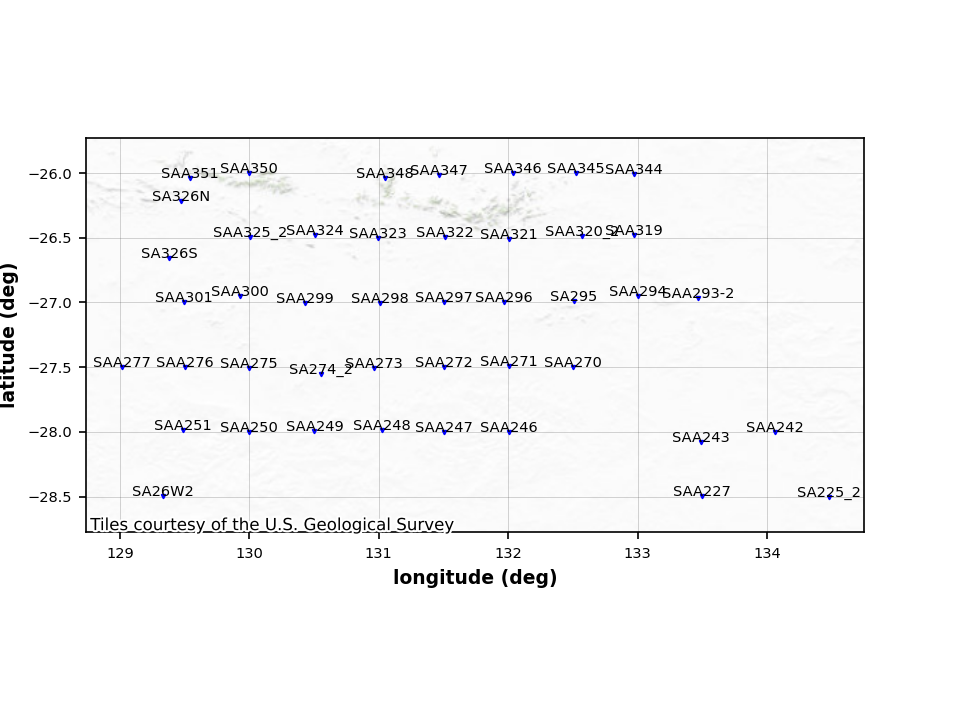

In [12]:
station_plot = mt_data.plot_stations(map_epsg=4326, bounding_box=None, figure=1)

### Plot Parameters

At first pass the plot is a little messy, lets update some parameters go make it look nicer.

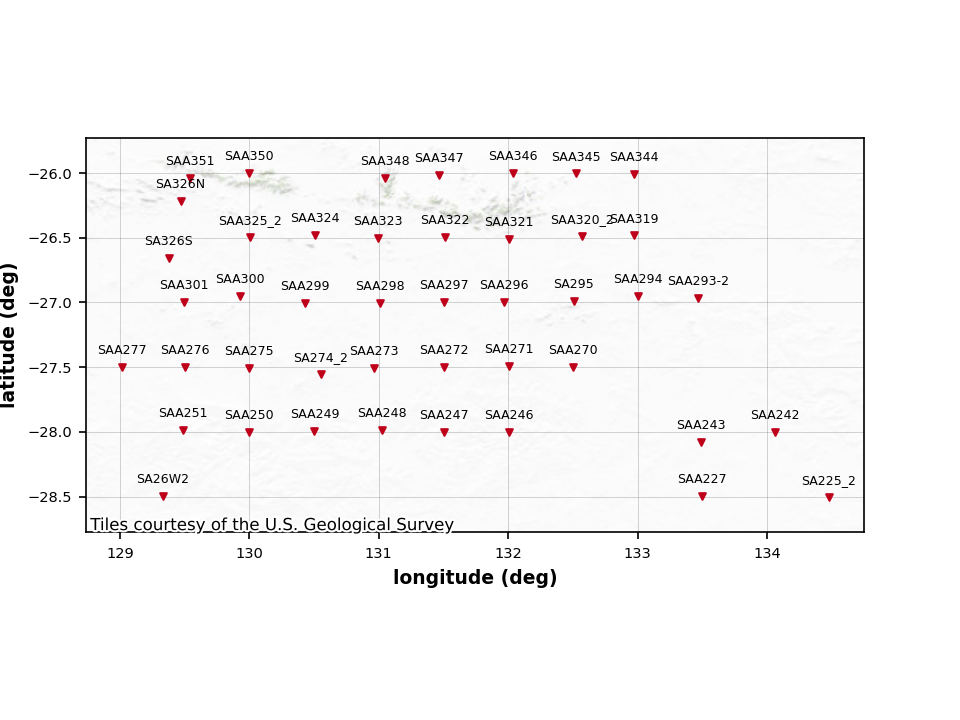

In [13]:
# marker parameters
station_plot.marker_size = 10
station_plot.marker_color = (.75, 0, .1)

# station font size
station_plot.text_size = 6
station_plot.text_y_pad = .1

# redraw
station_plot.redraw_plot()

### Select an area using bounding box

The dense are of stations near Yellowstone is our local target.  Lets select a bounding box on initialization of `plot_stations`.

The bounding box needs to be (min(longitude), max(longitude), min(latitude), max(latitude))

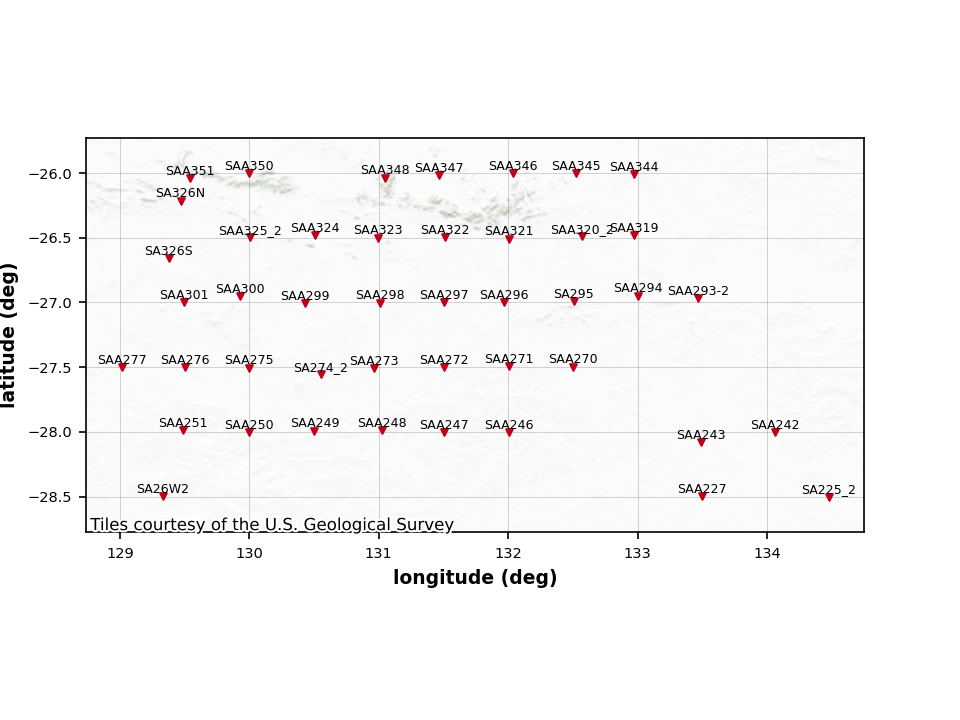

In [15]:
plot_bbox_stations = mt_data.plot_stations(bounding_box=[129, 131, -27, -26], marker_size=10, marker_color=(.75, 0, .1), text_size=6, text_y_pad=.025, fig_num=3)

### Change the Background Map

Maybe you don't want to look at the topo, but want to look at the imagery.  You can set the `cx_source` to something that will show imagery, though sometimes the imagery isn't great, at least from the USGS.  Other providers may have better options

In [16]:
import contextily as cx

#### USGS Imagery and Topo

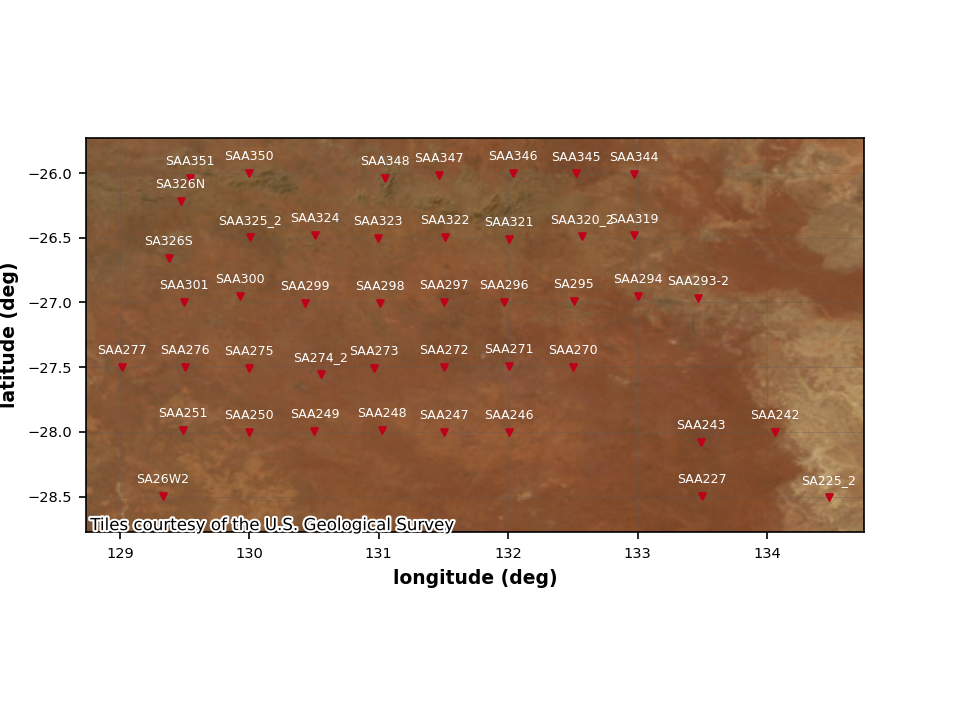

In [18]:
station_plot.cx_source = cx.providers.USGS.USImagery
station_plot.fig_num = 5
station_plot.text_color = (1, 1, 1)
station_plot.redraw_plot()

#### Shaded Relief

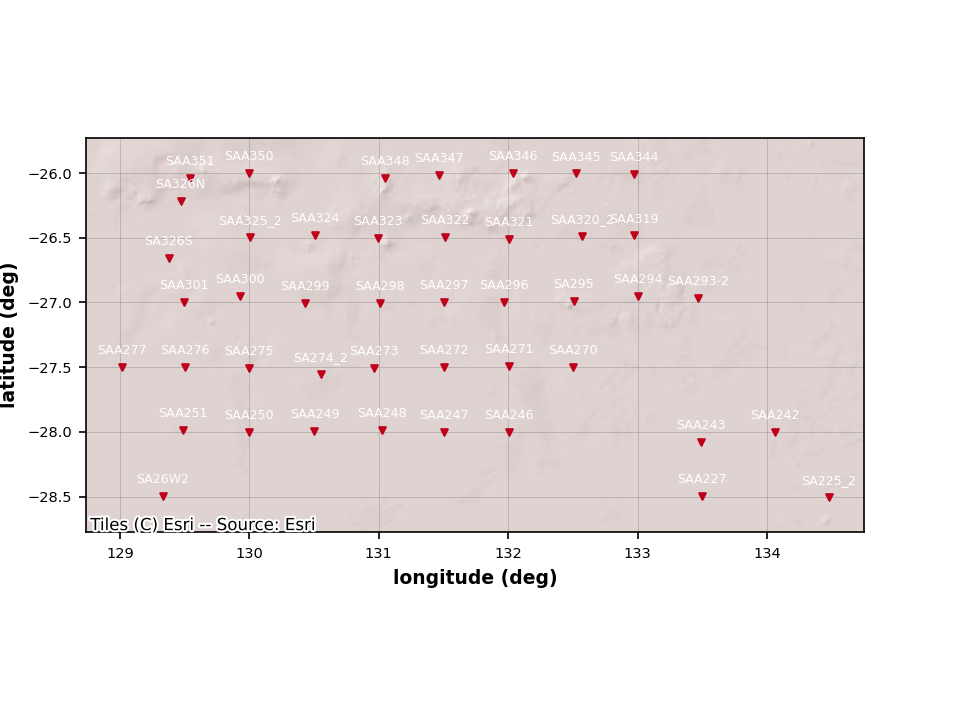

In [19]:
station_plot.cx_source = cx.providers.Esri.WorldShadedRelief
station_plot.fig_num = 6
station_plot.redraw_plot()

#### Basic Map

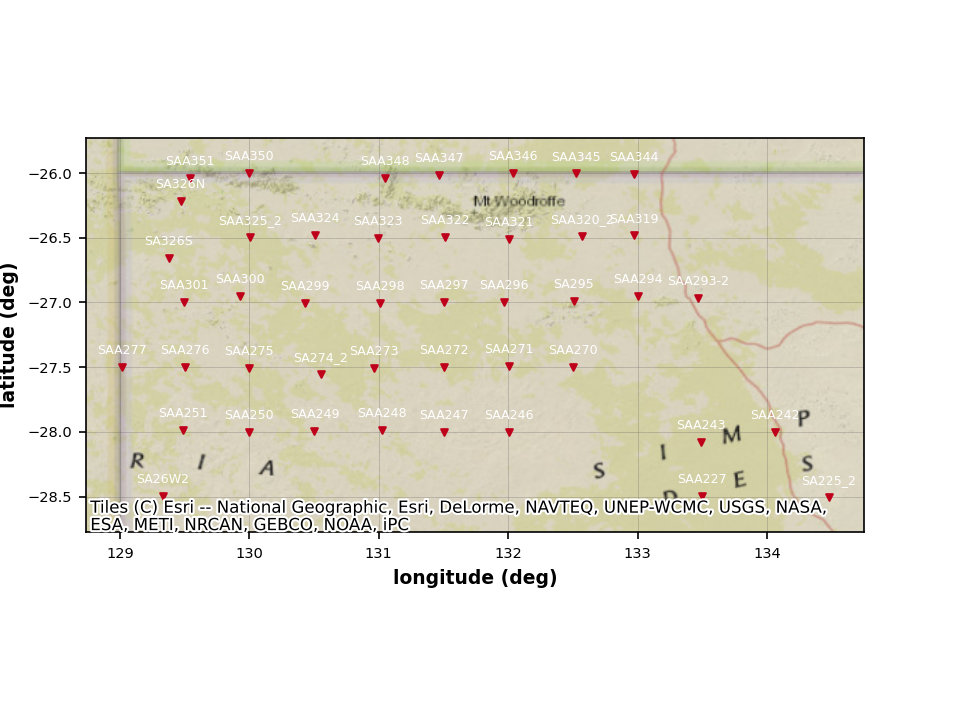

In [20]:
station_plot.cx_source = cx.providers.Esri.NatGeoWorldMap
station_plot.fig_num = 7
station_plot.redraw_plot()

#### Terrain

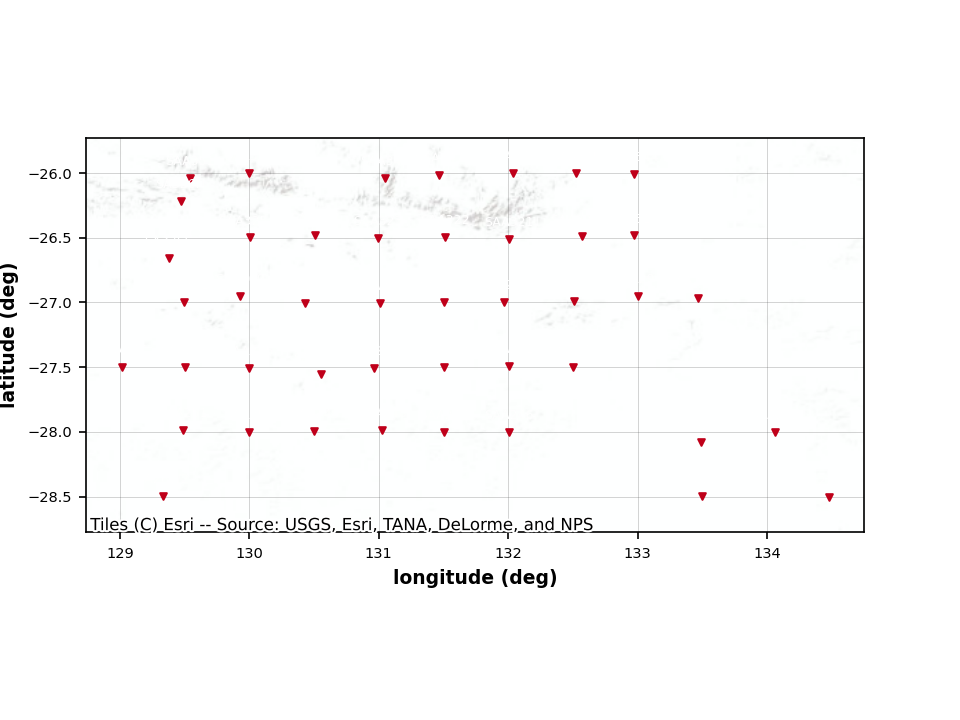

In [21]:
station_plot.cx_source = cx.providers.Esri.WorldTerrain
station_plot.fig_num = 8
station_plot.redraw_plot()